In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
line = np.linspace(0, 100, 1000)

In [5]:
plt.plot(line, np.sin(line))

In [6]:
X = line.reshape(-1, 1)
y = np.sin(line) > 0

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X_train, y_train)

In [9]:
tree.score(X_train, y_train)

1.0

In [10]:
tree.score(X_test, y_test)

0.984

In [11]:
from scripts.transformer_prediction_interface import TabPFNClassifier
tabpfn = TabPFNClassifier(device="cpu", model_string="tabpfn__emsize_512_nlayers_12_steps_2048_bs_32ada_lr_0.0001_1_gpu_07_24_2023_01_43_33", epoch="1650", N_ensemble_configurations=3)

/anaconda/envs/tabpfn/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
y_pred_tabpfn = tabpfn.fit(X_train, y_train).predict(X_test)

Using a Transformer with 25.83 M parameters
Using cpu device


In [13]:
tabpfn.fit(X_train, y_train).score(X_test, y_test)

0.508

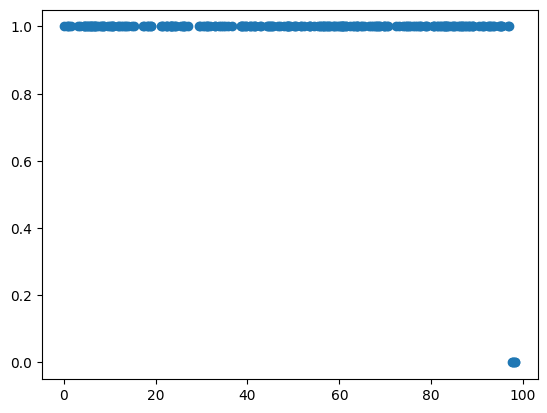

In [14]:
plt.plot(X_test.ravel(), y_pred_tabpfn, 'o')

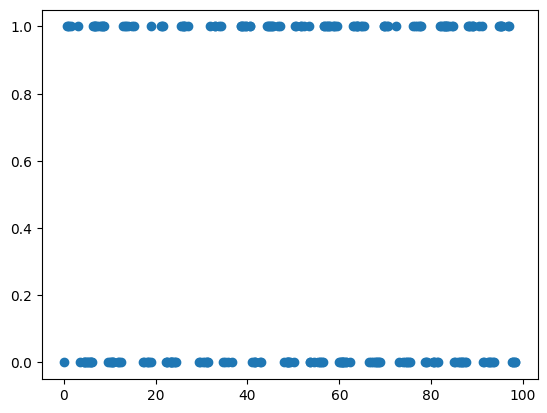

In [15]:
plt.plot(X_test.ravel(), tree.predict(X_test), 'o')

In [16]:
X_train.shape

(750, 1)

In [17]:
y_train.shape

(750,)

In [18]:
from tabpfn.transformer_make_model import ShiftClassifier, EnsembleMeta, MotherNetClassifier
device = "cpu"
mothernet_21_46_25_3940_ensemble3 = EnsembleMeta(MotherNetClassifier(path="mn_d2048_H4096_L2_W32_P512_1_gpu_warm_08_25_2023_21_46_25_epoch_3940_no_optimizer.pickle", device=device), n_estimators=3)
y_pred_mothernet = mothernet_21_46_25_3940_ensemble3.fit(X_train, y_train).predict(X_test)

Using a Transformer with 149.66 M parameters
Using cpu device


In [19]:
mothernet_21_46_25_3940_ensemble3.score(X_test, y_test)

0.48

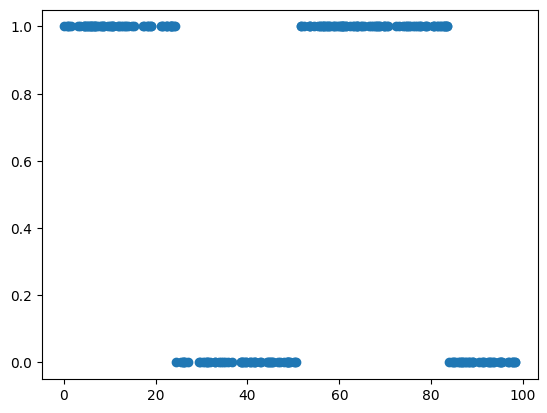

In [20]:
plt.plot(X_test.ravel(), y_pred_mothernet, 'o')

In [2]:
def make_data(n_classes, n_samples, n_steps):
    classes = (np.random.randint(0, n_classes) + np.cumsum(1 - 2 * np.random.randint(0, 2, size=n_steps))) % n_classes
    steps = np.sort(np.random.uniform(size=n_steps - 1))
    samples = np.random.uniform(size=n_samples)
    return samples.reshape(-1, 1), classes[np.searchsorted(steps, samples)]

In [22]:
n_steps = 10
n_samples = 100
n_classes = 3
classes = (np.random.randint(0, n_classes) + np.cumsum(1 - 2 * np.random.randint(0, 2, size=n_steps))) % n_classes
steps = np.sort(np.random.uniform(size=n_steps - 1))
samples = np.random.uniform(size=n_samples)

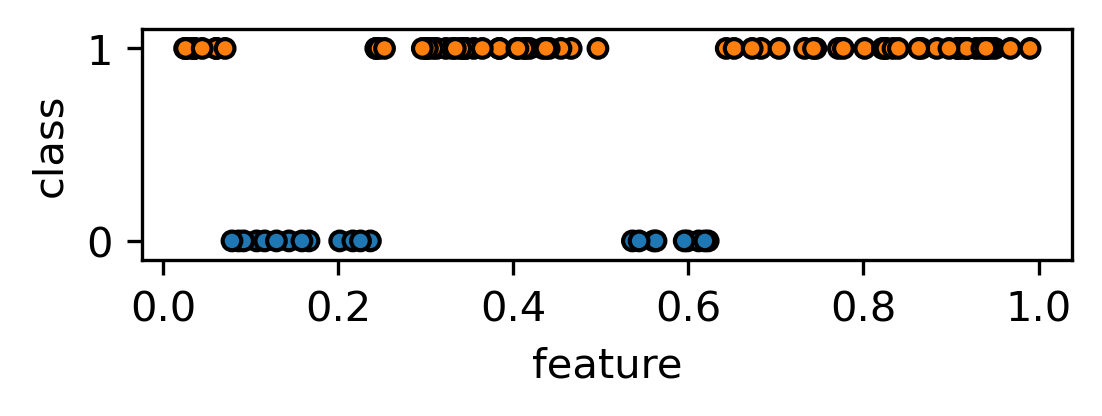

In [34]:
import matplotlib
X, y = make_data(2, 100, 5)
plt.figure(figsize=(4, 1), dpi=300)
plt.scatter(X, y, marker="o", edgecolor="k", c=y, s=20, cmap=plt.cm.tab10, norm=matplotlib.colors.Normalize(vmin=0, vmax=10, clip=False))
plt.yticks([0, 1])
plt.ylabel("class")
plt.xlabel("feature")
plt.ylim(-0.1, 1.1)
plt.savefig("figures/1d_classification_example.pdf", bbox_inches="tight")

In [25]:
X, y = make_data(3, 100, 10)

In [51]:
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import torch
torch.set_num_threads(1)
device = "cpu"
mothernet = EnsembleMeta(MotherNetClassifier(path="mn_d2048_H4096_L2_W32_P512_1_gpu_warm_08_25_2023_21_46_25_epoch_3940_no_optimizer.pickle", device=device), n_estimators=3)
rf_scores = []
tabpfn_scores = []
mothernet_scores = []
mlp_scores = []
n_steps = []
for n_step in [2, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    for i in range(5):
        X, y = make_data(2, 2000, n_step)
        n_steps.append(n_step)
        mlp_scores.append(np.mean(cross_validate(MLPClassifier(max_iter=1000), X, y, cv=ShuffleSplit(train_size=.5))['test_score']))
        tabpfn_scores.append(np.mean(cross_validate(tabpfn, X, y, cv=ShuffleSplit(train_size=.5))['test_score']))
        mothernet_scores.append(np.mean(cross_validate(mothernet, X, y, cv=ShuffleSplit(train_size=.5))['test_score']))
        rf_scores.append(np.mean(cross_validate(RandomForestClassifier(), X, y, cv=ShuffleSplit(train_size=.5))['test_score']))

/anaconda/envs/tabpfn/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/anaconda/envs/tabpfn/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/anaconda/envs/tabpfn/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/anaconda/envs/tabpfn/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/anaconda/envs/tabpf

In [81]:
import pandas as pd
df4 = pd.DataFrame({'TabPFN': tabpfn_scores, 'RandomForest': rf_scores, 'MotherNet': mothernet_scores, 'MLP': mlp_scores, 'n_steps': n_steps})

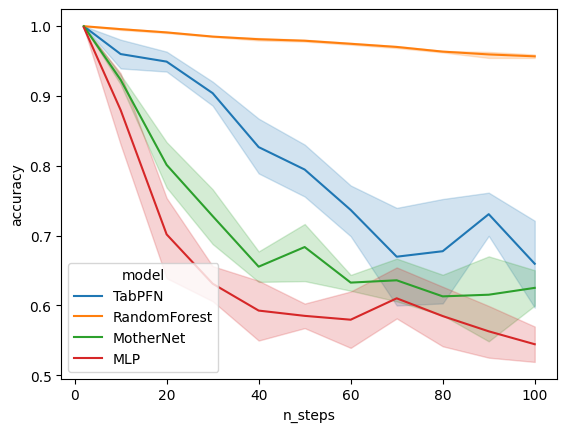

In [85]:
a = sns.lineplot(data=df4.melt(id_vars="n_steps", value_name="accuracy", var_name="model"), x="n_steps", y="accuracy", hue="model", )
plt.savefig("figures/one_d_classification.pdf", dpi=300, bbox_inches="tight")

In [74]:
import seaborn as sns

In [75]:
sns.lineplot(data=df3.melt(id_vars="n_steps"), x="n_steps", y="value", hue="variable", )


NameError: name 'df3' is not defined

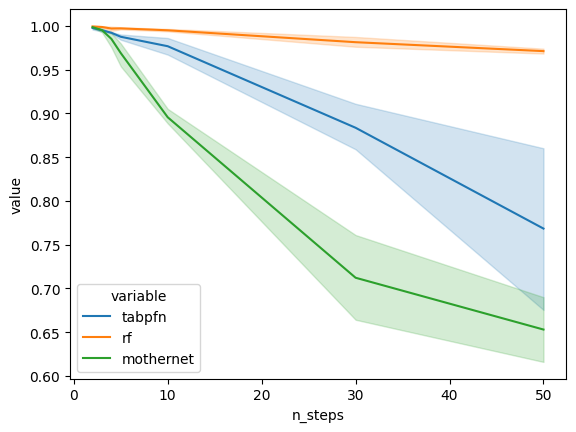

In [43]:
a = sns.lineplot(data=df2.melt(id_vars="n_steps"), x="n_steps", y="value", hue="variable", )
#a.set(xscale='log')

[None]

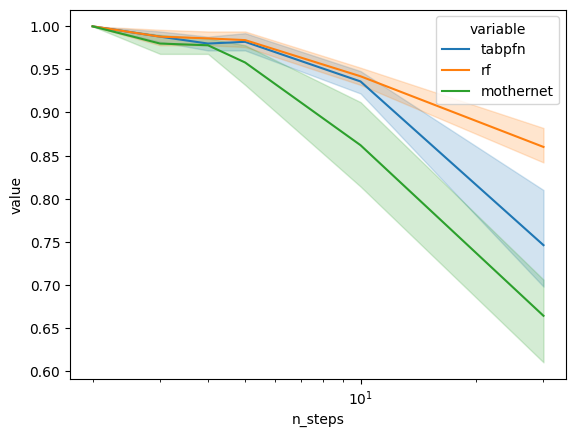

In [36]:
a = sns.lineplot(data=df.melt(id_vars="n_steps"), x="n_steps", y="value", hue="variable", )
a.set(xscale='log')

In [13]:
def get_scores_steps(steps, models):
    X, y = make_data(2, 2000, steps)
    result = {'steps': steps}
    for model_name, model in models.items():
        result[model_name] = np.mean(cross_validate(model, X, y, cv=ShuffleSplit(train_size=.5), scoring="roc_auc")['test_score'])
    return result

In [15]:
from tabpfn.transformer_make_model import EnsembleMeta, MotherNetClassifier
from scripts.transformer_prediction_interface import TabPFNClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import torch
import numpy as np
from joblib import Parallel, delayed
import pandas as pd

torch.set_num_threads(1)
device = "cpu"
tabpfn = TabPFNClassifier(device="cpu", model_string="tabpfn__emsize_512_nlayers_12_steps_2048_bs_32ada_lr_0.0001_1_gpu_07_24_2023_01_43_33_nooptimizer", epoch="1650", N_ensemble_configurations=3)
mothernet = EnsembleMeta(MotherNetClassifier(path="mn_d2048_H4096_L2_W32_P512_1_gpu_warm_08_25_2023_21_46_25_epoch_3940_no_optimizer.pickle", device=device), n_estimators=3)


models = {
    'MLP': MLPClassifier(max_iter=4000),
    'TabPFN': tabpfn,
    'RandomForest': RandomForestClassifier(),
    'MotherNet': mothernet

}
res = Parallel(n_jobs=-1)(delayed(get_scores_steps)(steps=steps, models=models) for i in range(20) for steps in [2, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
rank2 = pd.DataFrame.from_dict(res)


Using a Transformer with 25.83 M parameters
Using cpu device
Using a Transformer with 149.66 M parameters
Using cpu device
Using a Transformer with 25.83 M parameters
Using cpu device
Using a Transformer with 149.66 M parameters
Using cpu device
Using a Transformer with 25.83 M parameters
Using cpu device
Using a Transformer with 149.66 M parameters
Using cpu device
Using a Transformer with 25.83 M parameters
Using cpu device
Using a Transformer with 149.66 M parameters
Using cpu device
Using a Transformer with 25.83 M parameters
Using cpu device
Using a Transformer with 149.66 M parameters
Using cpu device
Using a Transformer with 25.83 M parameters
Using cpu device
Using a Transformer with 149.66 M parameters
Using cpu device
Using a Transformer with 25.83 M parameters
Using cpu device
Using a Transformer with 149.66 M parameters
Using cpu device
Using a Transformer with 25.83 M parameters
Using cpu device
Using a Transformer with 149.66 M parameters
Using cpu device
Using a Transfor

Bad pipe message: %s [b'w\xf90\x1dJ\xd9\x86o\x05\xba\xdf\x07\xee\xa9e(\x08\xc3 \x0f\xe5e\x10Z26[\xe0\xe6J\xf2-\xf6\x83\x88O9\x89\x8ay\xf3\t\xde ;`K\xb8\xb0\xfa\xb5\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04']
Bad pipe message: %s [b'\x01\x02']
Bad pipe message: %s [b'\x83>}\xe4n\xbc\xec\xf2"\x9fMo\xed\xadp\xd0\xb2\x94 A3\xa7\xe0\xcc\x0c\xd1\x8c\r@|n5zQ\xae**\x95\xfe\x03^']
Bad pipe message: %s [b'AA\x89\xe3\xca']
Bad pipe message: %s [b'\xc0\xf8,\x9b\xc9k\xa3\xcb\xc5-.b\x9e\x80D']
Bad pipe message: %s [b'\x8b_\xcd\x8d\x10n\xfd\x031\xd5|\xbdI(\x8b\xc4h\xd0\x00\x00\xa6\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00']
Bad pipe message: %s [b"s\xc0w\x00\xc4\x00\xc3\xc0#\xc0'\x00g\x00@\xc0r\xc0v\x00\xbe\x00\xbd\xc0\n\xc0\x14\x009\x008\x00\x88\x00\x87\xc0\t\xc0\x13\x003\

Text(12.597222222222223, 0.5, 'ROC AUC')

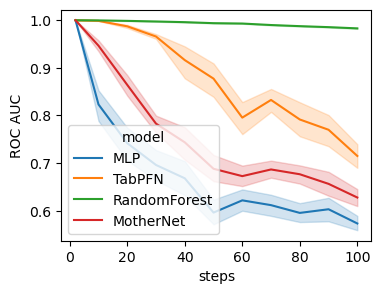

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3))
sns.lineplot(data=rank2.melt(id_vars="steps", var_name="model", value_name="score"), x="steps", y="score", hue="model", ax=plt.gca())
plt.savefig("figures/one_d_classification.pdf", dpi=300, bbox_inches="tight")
plt.ylabel("ROC AUC")

In [1]:
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from tabpfn.prediction import TabPFNClassifier

import torch
torch.set_num_threads(1)
device = "cpu"
# mothernet = EnsembleMeta(ForwardMLPModel(path="mn_d2048_H4096_L2_W32_P512_1_gpu_warm_08_25_2023_21_46_25_epoch_3940_no_optimizer.pickle", device=device), n_estimators=3)
tabpfn = TabPFNClassifier(device="cpu", model_string="tabpfn__emsize_512_nlayers_12_steps_2048_bs_32ada_lr_0.0001_1_gpu_07_24_2023_01_43_33", epoch="1650", N_ensemble_configurations=3)
tabpfn_short = TabPFNClassifier(device="cpu", model_string="tabpfn_l3.3e-05_AFalse_lrdecay0.86_minlr4e-08_1_gpu_12_19_2023_21_07_10", epoch="90", N_ensemble_configurations=3)
tabpfn_step_prior = TabPFNClassifier(device="cpu", model_string="tabpfn_l3.3e-05_AFalse_w0.005_adambeta10.86_lrdecay0.86_minlr4e-08_multiclasstypesteps_1_gpu_12_19_2023_21_05_47", epoch="90", N_ensemble_configurations=3)

models = {
    'tabpfn_step_prior': tabpfn_step_prior,
    'TabPFN': tabpfn,
    'RandomForest': RandomForestClassifier(),
    'tabpfn_short': tabpfn_short

}
res = Parallel(n_jobs=-1)(delayed(get_scores_steps)(steps=steps, models=models) for i in range(20) for steps in [2, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
rank_new = pd.DataFrame.from_dict(res)

ModuleNotFoundError: No module named 'tabpfn.prediction'